In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
import time



The dataset is taken from kaggle. <br>


HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.<br>
HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.<br>
CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.<br>
BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).<br>
Smoker : Indicates if the person has smoked at least 100 cigarettes.<br>
Stroke : Indicates if the person has a history of stroke.<br>
Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.<br>
PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.<br>
Fruits : Indicates if the person consumes 1 or more fruit(s) daily.<br>
Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.<br>
HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.<br>
AnyHealthcare : Indicates if the person has any form of health insurance.<br>
NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.<br>
GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).<br>
Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.<br>
PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.<br>
DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.<br>
Sex : Indicates the gender of the person, where 0 is female and 1 is male.<br>
Age : Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.<br>
Education : Indicates the highest year of school completed, with 0 being never attended or kindergarten only and 6 being, having attended 4 years of college or more.<br>
Income : Indicates the total household income, ranging from 1 (at least $10,000) to ($75,000+)<br>

In [ ]:
data = pd.read_csv("../heart_risk_data.csv")
data.shape

(253680, 22)

## Checking for missing & duplicate values

In [3]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
data.duplicated().sum()

23899

We decided to move forward keeping all duplicates as there is no PII. Therefore, there could be chance that two people may have the same conditions


In [5]:

df = data


In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.head(4)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

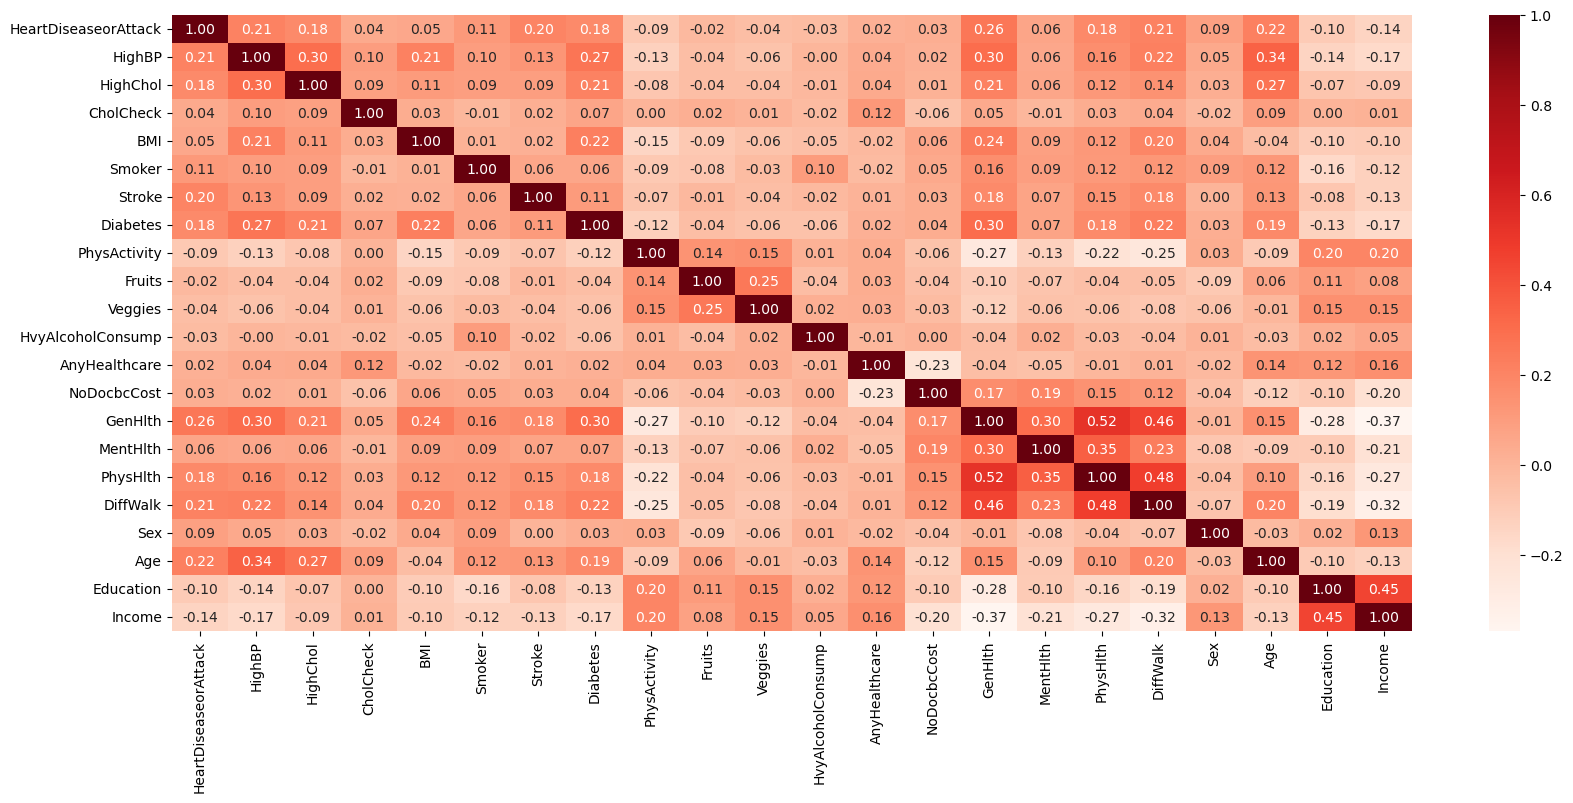

In [9]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(),annot =True,fmt='.2f', cmap='Reds')
plt.show()

In [10]:
data.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


# Data Split

In [11]:


X = df.drop(columns=['HeartDiseaseorAttack'])  
y = df['HeartDiseaseorAttack'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


# Scaling the features 
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
# print(X_train_scaled)

X_test_scaled = scale.transform(X_test)

Training set size: (202944, 21)
Test set size: (50736, 21)


# Full Model (With all features)

In [12]:
log_reg_full = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_full.fit(X_train_scaled, y_train)

y_pred_full = log_reg_full.predict(X_test_scaled)
y_prob_full = log_reg_full.predict_proba(X_test_scaled)[:, 1]


acc_full = accuracy_score(y_test, y_pred_full)
recall_full = recall_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full, average='binary')

auc_full = roc_auc_score(y_test, y_prob_full)

print("Full Model Metrics:")
print("Accuracy: {:.4f}".format(acc_full))
print("Recall: {:.4f}".format(recall_full))
print("F1 Score: {:.4f}".format(f1_full))
print("AUC-ROC: {:.4f}".format(auc_full))

Full Model Metrics:
Accuracy: 0.7534
Recall: 0.7970
F1 Score: 0.3785
AUC-ROC: 0.8470


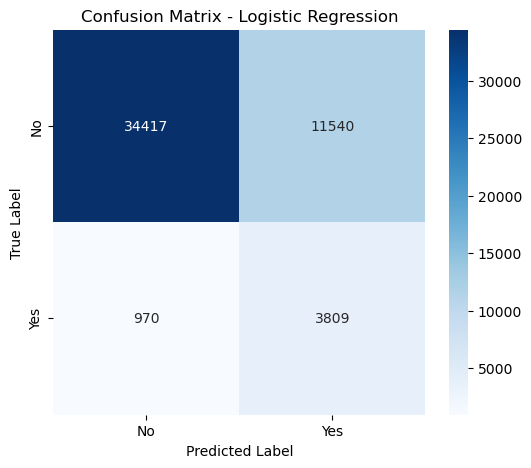

In [13]:
cm = confusion_matrix(y_test, y_pred_full)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Selection & Comparision




In [14]:



# Measures mutual information between feature and target. Also, captures nonlinear relationships.

k = 10
selector = SelectKBest(score_func=mutual_info_classif, k=k)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(selected_features)

# Logistic Regression model using the selected features only

log_reg = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')
log_reg.fit(X_train_selected, y_train)

y_pred_mutual = log_reg.predict(X_test_selected)
y_prob_mutual = log_reg.predict_proba(X_test_selected)[:, 1]  


acc_red = accuracy_score(y_test, y_pred_mutual)
recall_red = recall_score(y_test, y_pred_mutual)
f1_red = f1_score(y_test, y_pred_mutual, average = 'binary')
auc_red = roc_auc_score(y_test, y_prob_mutual)

print("Accuracy: {:.4f}".format(acc_red))
print("Recall: {:.4f}".format(recall_red))
print("F1 Score: {:.4f}".format(f1_red))
print("AUC-ROC: {:.4f}".format(auc_red))



              Feature     Score
0              HighBP  0.040634
13            GenHlth  0.037502
1            HighChol  0.034494
18                Age  0.030950
16           DiffWalk  0.030246
4              Smoker  0.025837
6            Diabetes  0.024006
7        PhysActivity  0.022368
17                Sex  0.021496
15           PhysHlth  0.020772
5              Stroke  0.019157
8              Fruits  0.017366
20             Income  0.015268
9             Veggies  0.012797
19          Education  0.012144
12        NoDocbcCost  0.011126
14           MentHlth  0.008972
2           CholCheck  0.008763
11      AnyHealthcare  0.006598
10  HvyAlcoholConsump  0.005926
3                 BMI  0.003529
Accuracy: 0.7473
Recall: 0.7966
F1 Score: 0.3726
AUC-ROC: 0.8398


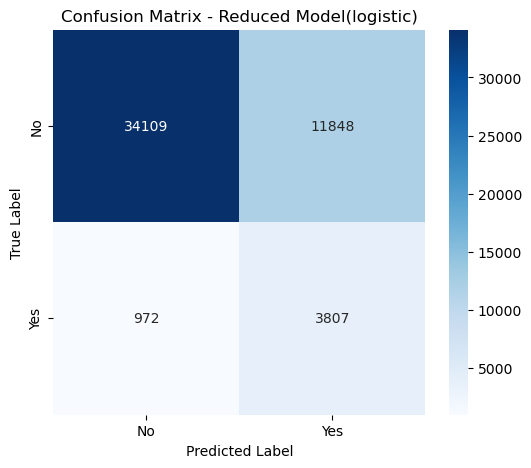

In [15]:
cm = confusion_matrix(y_test, y_pred_mutual)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - Reduced Model(logistic)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LASSO

In [16]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42, max_iter=1000)
lasso.fit(X_train_scaled, y_train)


y_pred_lasso = lasso.predict(X_test_scaled)
y_prob_lasso = lasso.predict_proba(X_test_scaled)[:, 1]

acc_lasso = accuracy_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso, average='binary')
f1_lasso = f1_score(y_test, y_pred_lasso, average = 'binary')
auc_lasso = roc_auc_score(y_test, y_prob_lasso)

print("Accuracy: {:.4f}".format(acc_lasso))
print("Recall: {:.4f}".format(recall_lasso))
print("F1 Score: {:.4f}".format(f1_lasso))
print("AUC-ROC: {:.4f}".format(auc_lasso))

lasso_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_[0]
})
lasso_coefficients_sorted = lasso_coefficients.sort_values(by="Coefficient", ascending=False)

print(lasso_coefficients_sorted)

selected_lasso_features = lasso_coefficients[lasso_coefficients["Coefficient"] != 0]
# print(selected_lasso_features)


Accuracy: 0.9071
Recall: 0.1258
F1 Score: 0.2033
AUC-ROC: 0.8469
              Feature  Coefficient
18                Age     0.783108
13            GenHlth     0.521355
17                Sex     0.382134
1            HighChol     0.302213
0              HighBP     0.259247
5              Stroke     0.192869
4              Smoker     0.183013
16           DiffWalk     0.111194
6            Diabetes     0.097273
2           CholCheck     0.088770
12        NoDocbcCost     0.060894
14           MentHlth     0.023761
9             Veggies     0.021764
7        PhysActivity     0.018076
19          Education     0.014207
3                 BMI     0.013452
15           PhysHlth     0.012602
8              Fruits     0.001822
11      AnyHealthcare    -0.001542
10  HvyAlcoholConsump    -0.072088
20             Income    -0.092375


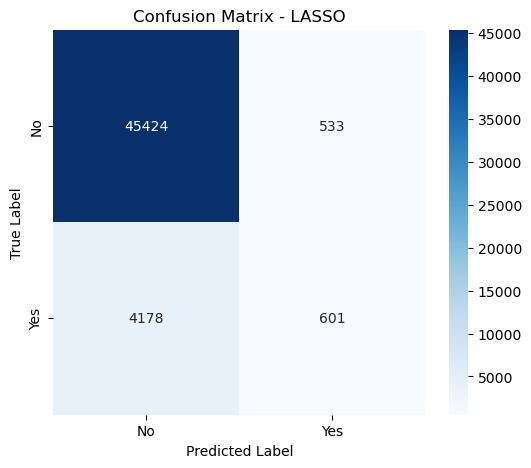

In [17]:
cm = confusion_matrix(y_test, y_pred_lasso)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - LASSO')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

LASSO selected all variables,which could mean all features are useful to some extent. There could be no strong collinearity among features.
However, some features (like HvyAlcoholConsump, Income, BMI, etc.) have very small coefficient values, indicating they contribute less to the model.

# Stepwise (Forward Selection and Backward Elimination)

Forward Stepwise Selection: Starts with no features and adds the most useful ones one by one based on recall. <br><br>
Backward Elimination : Starts with all features and removes the least useful ones one by one based on recall.

In [18]:

log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced' )

# Forward Stepwise Selection

stepwise_forward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='forward', scoring='recall', cv=5)
stepwise_forward.fit(X_train_scaled, y_train)
selected_features_forward = X_train.columns[stepwise_forward.get_support()].tolist()

print("Forward Stepwise Selected Features (Logistic Regression):", selected_features_forward, "\n")
print("The number of seleted features by Forward Selection are", len(selected_features_forward), "\n")

# Backward Stepwise Selection

stepwise_backward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='backward', scoring='recall', cv=5)
stepwise_backward.fit(X_train_scaled, y_train)
selected_features_backward = X_train.columns[stepwise_backward.get_support()].tolist()
print("Backward Stepwise Selected Features (Logistic Regression):", selected_features_backward , "\n")
print("The number of seleted features by Backward Elimination are", len(selected_features_backward))

Forward Stepwise Selected Features (Logistic Regression): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'Sex', 'Age'] 

The number of seleted features by Forward Selection are 10 

Backward Stepwise Selected Features (Logistic Regression): ['HighBP', 'HighChol', 'CholCheck', 'Diabetes', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex', 'Age', 'Income'] 

The number of seleted features by Backward Elimination are 11


In [19]:
log_reg_forward = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_backward = LogisticRegression(max_iter=1000, class_weight='balanced')

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

selected_features_forward = X_train.columns[stepwise_forward.get_support()].tolist()
selected_features_backward = X_train.columns[stepwise_backward.get_support()].tolist()
# print(selected_features_forward)

# Training models with selected features
log_reg_forward.fit(X_train_scaled_df[selected_features_forward], y_train)
log_reg_backward.fit(X_train_scaled_df[selected_features_backward], y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
# predictions

y_pred_forward = log_reg_forward.predict(X_test_scaled_df[selected_features_forward])
y_pred_backward = log_reg_backward.predict(X_test_scaled_df[selected_features_backward])

#prediction probabilities for AUC-ROC

y_proba_forward = log_reg_forward.predict_proba(X_test_scaled_df[selected_features_forward])[:, 1]
y_proba_backward = log_reg_backward.predict_proba(X_test_scaled_df[selected_features_backward])[:, 1]


In [21]:
# Evaluation Forward Stepwise

acc_Stepwise_forward = accuracy_score(y_test, y_pred_forward)
recall_Stepwise_forward = recall_score(y_test, y_pred_forward, average='binary')  
f1_Stepwise_forward = f1_score(y_test, y_pred_forward, average='binary')  
auc_Stepwise_forward = roc_auc_score(y_test, y_proba_forward)

# Print out the metrics

print(f"Recall: {acc_Stepwise_forward:.4f}")
print(f"Recall: {recall_Stepwise_forward:.4f}")
print(f"F1-Score: {f1_Stepwise_forward:.4f}")
print(f"AUC-ROC: {auc_Stepwise_forward:.4f}")

Recall: 0.7342
Recall: 0.7981
F1-Score: 0.3612
AUC-ROC: 0.8377


In [22]:
# Evaluation Backward Stepwise

acc_Stepwise_backward = accuracy_score(y_test, y_pred_backward)
recall_Stepwise_backward = recall_score(y_test, y_pred_backward, average='binary')  
f1_Stepwise_backward = f1_score(y_test, y_pred_backward, average='binary')  
auc_Stepwise_backward = roc_auc_score(y_test, y_proba_backward)

# Print out the metrics

print(f"Recall: {acc_Stepwise_backward:.4f}")
print(f"Recall: {recall_Stepwise_backward:.4f}")
print(f"F1-Score: {f1_Stepwise_backward:.4f}")
print(f"AUC-ROC: {auc_Stepwise_backward:.4f}")

Recall: 0.7396
Recall: 0.7987
F1-Score: 0.3662
AUC-ROC: 0.8383


# Modeling

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

scoring_type = "recall"

rfclassifier= RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

#performing some parameter tuning using gridsearch
rfclassifier= RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
params = {'max_depth':[2,5,8],
          'n_estimators': [200,500,800],
          'min_samples_split': [2,3],
          'max_leaf_nodes': [None,2],
          'bootstrap': [True, False],
}

clf = GridSearchCV(estimator=rfclassifier,
                   param_grid=params,
                   verbose=3, 
                   n_jobs=-1, 
                   scoring="recall",
                   cv=5)

# Fit the GridSearchCV model
clf.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedsearchCV
print("Best parameters:", clf.best_params_)

# Printing best score
print(f'{scoring_type} score is: {clf.best_score_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'bootstrap': False, 'max_depth': 8, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 800}
recall score is: 0.8136967264017823


In [24]:
# Best parameters: {'bootstrap': False, 'max_depth': 8, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 800}
# recall score is: 0.8136967264017823


best_params = {'bootstrap': False, 'max_depth': 8, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 800}

# Fitting the GridSearchCV model

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced').set_params(**best_params)
rf_cross_validation_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=scoring_type)

rf_model = rf_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


print(f'RF - CV {scoring_type} scores: {rf_cross_validation_scores}')
print(f'RF - Average CV {scoring_type} score: {rf_cross_validation_scores.mean()}')

y_train_pred = rf_model.predict(X_train)

# Evaluation on Test Data
y_pred_rf = rf_model.predict(X_test)


RF - CV recall scores: [0.81480513 0.81088151 0.81375883 0.816113   0.81292517]
RF - Average CV recall score: 0.8136967264017823


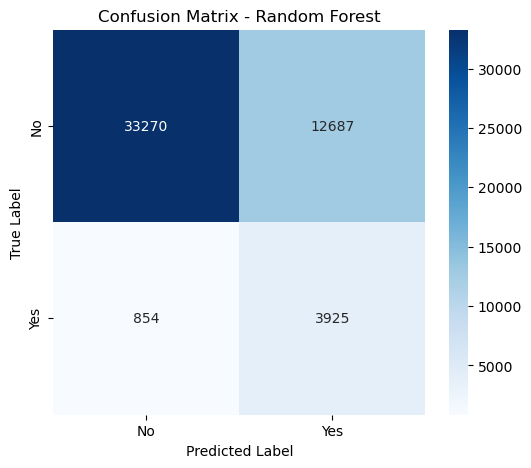

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [26]:
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print evaluation metrics
print("\nEvaluation Metrics on Test Data:")
print("Accuracy: {:.4f}".format(acc_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1 Score: {:.4f}".format(f1_rf))
print("ROC AUC: {:.4f}".format(auc_rf))



Evaluation Metrics on Test Data:
Accuracy: 0.7331
Recall: 0.8213
F1 Score: 0.3670
ROC AUC: 0.8452


In [27]:

feature_importances = rf_model.feature_importances_

# Creating a DataFrame to view feature importances
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)

              Feature  Importance
18                Age    0.218875
13            GenHlth    0.198562
0              HighBP    0.167526
1            HighChol    0.099862
16           DiffWalk    0.075896
5              Stroke    0.050405
15           PhysHlth    0.043549
17                Sex    0.041273
6            Diabetes    0.039778
4              Smoker    0.021944
20             Income    0.021410
19          Education    0.005254
3                 BMI    0.004469
14           MentHlth    0.003289
7        PhysActivity    0.003098
2           CholCheck    0.001704
10  HvyAlcoholConsump    0.000840
12        NoDocbcCost    0.000779
11      AnyHealthcare    0.000619
9             Veggies    0.000445
8              Fruits    0.000425


# Reduced model based on Feature Importance of Random Forest 

In [28]:

X_train_reduced = X_train.drop(columns=['Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'AnyHealthcare'])
X_test_reduced = X_test.drop(columns=['Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'AnyHealthcare'])


# Training a model on the reduced dataset
rf_reduced_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced').set_params(**best_params)
rf_cross_validation_scores = cross_val_score(rf_reduced_model, X_train_reduced, y_train, cv=5, scoring=scoring_type)

rf_reduced_model.fit(X_train_reduced, y_train)

print(f'RF - CV {scoring_type} scores: {rf_cross_validation_scores}')


# Evaluating the reduced model
y_pred_reduced_rf = rf_reduced_model.predict(X_test_reduced)

print("Model performance with reduced features:")
print("Accuracy:", accuracy_score(y_test, y_pred_reduced_rf))
print("Recall:", recall_score(y_test, y_pred_reduced_rf, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred_reduced_rf, average='binary'))
print("AUC:", roc_auc_score(y_test, rf_reduced_model.predict_proba(X_test_reduced)[:, 1]))

RF - CV recall scores: [0.81846717 0.80983521 0.81532828 0.82003662 0.81161695]
Model performance with reduced features:
Accuracy: 0.7325370545569221
Recall: 0.8233940154844109
F1 Score: 0.3670708955223881
AUC: 0.8461148983927647


# SVM

In [29]:
svm_model = SVC(
    kernel="rbf",
    probability=True,
    class_weight="balanced",
    random_state=42, 
    max_iter=1000
)

svm_model.fit(X_train_scaled, y_train)

# # predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  


acc_svm = accuracy_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, y_prob)

print("SVM Metrics:")
print("Accuracy: {:.4f}".format(acc_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))
print("AUC-ROC: {:.4f}".format(auc_svm))

/Users/shistatabagale/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Metrics:
Accuracy: 0.8646
Recall: 0.0123
F1 Score: 0.0169
AUC-ROC: 0.3605


# SMOTE (Synthetic Minority Over-sampling Technique)

As our dataset is not balanced,I tried SMOTE approach before training a Logistic Regression model.It generates synthetic samples for the minority class rather than simply duplicating existing ones.

In [30]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

y_pred_smote = model.predict(X_test_scaled)
y_prob_smote = model.predict_proba(X_test_scaled)[:, 1]



In [31]:
acc_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote, average='binary')
f1_smote = f1_score(y_test, y_pred_smote, average='binary')
auc_smote = roc_auc_score(y_test, y_prob_smote)

print("\nEvaluation Metrics on Test Data:")
print("Accuracy: {:.4f}".format(acc_smote))
print("Recall: {:.4f}".format(recall_smote))
print("F1 Score: {:.4f}".format(f1_smote))
print("ROC AUC: {:.4f}".format(auc_smote))




Evaluation Metrics on Test Data:
Accuracy: 0.7557
Recall: 0.7918
F1 Score: 0.3791
ROC AUC: 0.8462


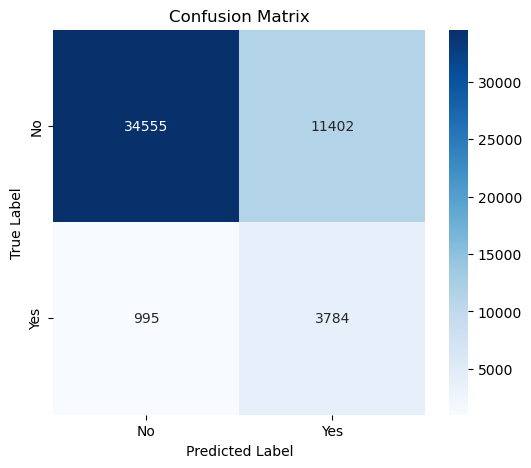

In [32]:
smote_cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(smote_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Findings





Our dataset is highly imbalanced. Therefore, though Accuracy is high it could be misleading.

SVM performed poorly. Could be because of max_iter set to 1000, limiting its convergence and leading to poor performance.(increasing max_iter to 5000 slightly decresed f1 score, while recall, accuracy and auc-roc got slightly increased. Tried removing max_iter but took forever to run the code)

SMOTE Logistic Regression showed slight improvement. Slightly better Accuracy (0.7419 vs. 0.7391) than other logistic regression models.
Recall is slightly lower (0.7718), meaning it might not catch as many positive cases as the Full Model.

No significant performance drop when using SelectKBest, LASSO meaning feature selection did not impact the model performance.


Since this is medical case, False Negatives (missed cases) are more dangerous than False Positives. Therefore, model with high recall(measures how many actual positive cases that model correctly identifies) is important.



# XG Boosting

In [33]:
# !pip install xgboost

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [34]:

xgb_model = xgb.XGBClassifier(seed=30)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)


In [35]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')

y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1] 
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("\nEvaluation Metrics on Test Data:")
print("Accuracy: {:.4f}".format(acc_xgb))
print("Recall: {:.4f}".format(recall_xgb))
print("F1 Score: {:.4f}".format(f1_xgb))
print("ROC AUC: {:.4f}".format(auc_xgb))





Evaluation Metrics on Test Data:
Accuracy: 0.9066
Recall: 0.1130
F1 Score: 0.1856
ROC AUC: 0.8446


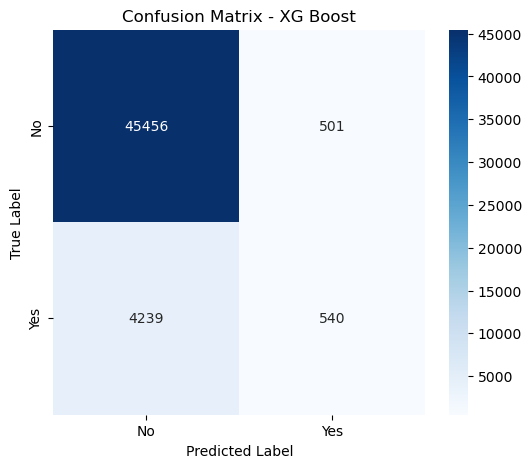

In [36]:

xgb_cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - XG Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Hyperparameter tuning 

In [37]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'max_depth': [2,5,8],
    'n_estimators': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.8],
    'min_child_weight': [1],
    'min_split_loss': [0, 0.5],
    'subsample': [0.8],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'scale_pos_weight': [1],
   
}


xgb_model = XGBClassifier(seed=30)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=2, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(X_train_scaled, y_train)


print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Evaluating the model
y_pred_best = best_model.predict(X_test_scaled)
print("Tuned Model Accuracy: ", accuracy_score(y_test, y_pred_best))
#### print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'min_split_loss': 0, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8}
Tuned Model Accuracy:  0.9022981709239988


In [38]:
acc_xgb_tuned = accuracy_score(y_test, y_pred_best)
recall_xgb_tuned = recall_score(y_test, y_pred_best, average='binary')
f1_xgb_tuned = f1_score(y_test, y_pred_best, average='binary')

y_pred_prob_best = best_model.predict_proba(X_test_scaled)[:, 1] 
auc_xgb_tuned = roc_auc_score(y_test, y_pred_prob_best)

print("\nEvaluation Metrics on Test Data:")
print("Accuracy: {:.4f}".format(acc_xgb_tuned))
print("Recall: {:.4f}".format(recall_xgb_tuned))
print("F1 Score: {:.4f}".format(f1_xgb_tuned))
print("ROC AUC: {:.4f}".format(auc_xgb_tuned))


Evaluation Metrics on Test Data:
Accuracy: 0.9023
Recall: 0.1475
F1 Score: 0.2215
ROC AUC: 0.8168


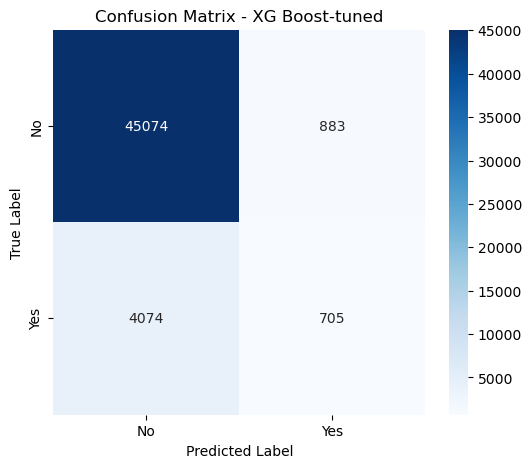

In [39]:
xgb_tuned_cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_tuned_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - XG Boost-tuned')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Linear Determinant Analysis

Linear Discriminant Analysis (LDA) helps in reducing the dimensionality of data while retaining the most significant features for classification tasks. It works by finding the linear combinations of features that best separate the classes in the dataset. 

LDA works by finding directions in the feature space that best separate the classes. It does this by maximizing the difference between the class means while minimizing the spread within each class.

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_classifier = LinearDiscriminantAnalysis()

lda_classifier.fit(X_train_scaled, y_train)

y_pred_lda = lda_classifier.predict(X_test_scaled)


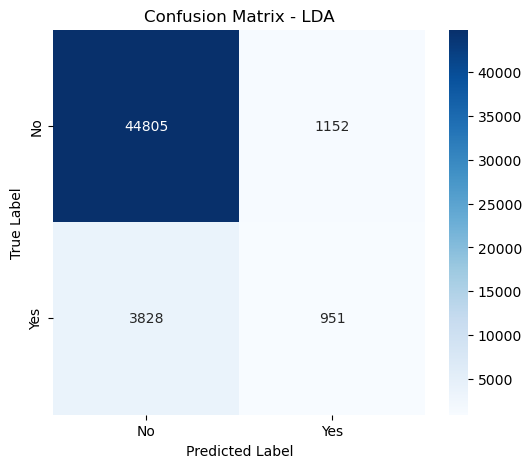

In [41]:

cm_lda = confusion_matrix(y_test, y_pred_lda)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix - LDA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [42]:
acc_LDA = accuracy_score(y_test, y_pred_lda)
recall_LDA = recall_score(y_test, y_pred_lda, average='binary')
f1_LDA = f1_score(y_test, y_pred_lda, average='binary')

y_pred_prob_lda = lda_classifier.predict_proba(X_test_scaled)[:, 1] 
auc_LDA = roc_auc_score(y_test, y_pred_prob_lda)

print("\nEvaluation Metrics on Test Data:")
print("Accuracy: {:.4f}".format(acc_LDA))
print("Recall: {:.4f}".format(recall_LDA))
print("F1 Score: {:.4f}".format(f1_LDA))
print("ROC AUC: {:.4f}".format(auc_xgb))



Evaluation Metrics on Test Data:
Accuracy: 0.9018
Recall: 0.1990
F1 Score: 0.2764
ROC AUC: 0.8446


# Quadratic Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()


qda.fit(X_train_scaled, y_train)

y_pred_qda = qda.predict(X_test_scaled)


acc_qda = accuracy_score(y_test, y_pred_qda)
recall_qda = recall_score(y_test, y_pred_qda,average='binary') #Vs Binary  
f1_qda = f1_score(y_test, y_pred_qda, average='binary')  


y_pred_proba_qda = qda.predict_proba(X_test_scaled)[:, 1]  

# Performing cross-validation with recall as the scoring metric
recall_scores_qda = cross_val_score(qda, X_train_scaled, y_train, cv=5, scoring='recall')

# Output the recall scores from cross-validation
print("Recall scores from cross-validation:", recall_scores_qda)
print("Average recall:", recall_scores_qda.mean())

auc_qda = roc_auc_score(y_test, y_pred_proba_qda)

# Print out the metrics

print(f"Accuracy: {acc_qda:.4f}")
print(f"Recall: {recall_qda:.4f}")
print(f"F1-Score: {f1_qda:.4f}")
print(f"AUC-ROC: {auc_qda:.4f}")


Recall scores from cross-validation: [0.49568402 0.48783678 0.47868166 0.48705205 0.50052329]
Average recall: 0.4899555596801589
Accuracy: 0.8327
Recall: 0.4794
F1-Score: 0.3506
AUC-ROC: 0.8047


# Stepwise on QDA

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
qda = QuadraticDiscriminantAnalysis()

# Forward Stepwise Selection on QDA
stepwise_forward_qda = SequentialFeatureSelector(qda, n_features_to_select='auto', direction='forward', scoring='recall', cv=5)
stepwise_forward_qda.fit(X_train_scaled, y_train)
selected_features_forward_qda = X_train.columns[stepwise_forward_qda.get_support()]
print("Forward Stepwise Selected Features (QDA):", selected_features_forward_qda.tolist())

# Backward Stepwise Selection on QDA
stepwise_backward_qda = SequentialFeatureSelector(qda, n_features_to_select='auto', direction='backward', scoring='recall', cv=5)
stepwise_backward_qda.fit(X_train_scaled, y_train)
selected_features_backward_qda = X_train.columns[stepwise_backward_qda.get_support()]
print("Backward Stepwise Selected Features (QDA):", selected_features_backward_qda.tolist())

Forward Stepwise Selected Features (QDA): ['CholCheck', 'Stroke', 'Diabetes', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age']
Backward Stepwise Selected Features (QDA): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Diabetes', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex', 'Age']


In [45]:
qda_forward = QuadraticDiscriminantAnalysis()
qda_backward = QuadraticDiscriminantAnalysis()

In [46]:
X_train_scaled_qda = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_qda = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
selected_features_forward_qda = X_train.columns[stepwise_forward_qda.get_support()].tolist()
selected_features_backward_qda = X_train.columns[stepwise_backward_qda.get_support()].tolist()

qda_forward.fit(X_train_scaled_qda[selected_features_forward_qda], y_train)
qda_backward.fit(X_train_scaled_qda[selected_features_backward_qda], y_train)

QuadraticDiscriminantAnalysis()

In [48]:
# predictions

y_pred_forward_qda = qda_forward.predict(X_test_scaled_qda[selected_features_forward_qda])
y_pred_backward_qda = qda_backward.predict(X_test_scaled_qda[selected_features_backward_qda])

 #prediction probabilities for AUC-ROC

y_proba_forward_qda = qda_forward.predict_proba(X_test_scaled_qda[selected_features_forward_qda])[:, 1]
y_proba_backward_qda = qda_backward.predict_proba(X_test_scaled_qda[selected_features_backward_qda])[:, 1]

In [49]:
acc_Stepwise_forward_qda = accuracy_score(y_test, y_pred_forward_qda)
recall_Stepwise_forward_qda = recall_score(y_test, y_pred_forward_qda, average='binary')  
f1_Stepwise_forward_qda = f1_score(y_test, y_pred_forward_qda, average='binary')  
auc_Stepwise_forward_qda = roc_auc_score(y_test, y_proba_forward_qda)

# Print out the metrics

print(f"Recall: {acc_Stepwise_forward_qda:.4f}")
print(f"Recall: {recall_Stepwise_forward_qda:.4f}")
print(f"F1-Score: {f1_Stepwise_forward_qda:.4f}")
print(f"AUC-ROC: {auc_Stepwise_forward_qda:.4f}")

Recall: 0.8337
Recall: 0.4340
F1-Score: 0.3296
AUC-ROC: 0.7882


In [50]:
acc_Stepwise_backward_qda = accuracy_score(y_test, y_pred_backward_qda)
recall_Stepwise_backward_qda = recall_score(y_test, y_pred_backward_qda, average='binary')  
f1_Stepwise_backward_qda = f1_score(y_test, y_pred_backward_qda, average='binary')  
auc_Stepwise_backward_qda = roc_auc_score(y_test, y_proba_backward_qda)

# Print out the metrics

print(f"Recall: {acc_Stepwise_backward_qda:.4f}")
print(f"Recall: {recall_Stepwise_backward_qda:.4f}")
print(f"F1-Score: {f1_Stepwise_backward_qda:.4f}")
print(f"AUC-ROC: {auc_Stepwise_backward_qda:.4f}")

Recall: 0.8243
Recall: 0.5388
F1-Score: 0.3662
AUC-ROC: 0.8021


In [51]:
performance_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "F1 Score", "AUC-ROC"],
    "Full Model": [acc_full, recall_full, f1_full, auc_full],
    "Reduced Model": [acc_red, recall_red, f1_red, auc_red],
    "LASSO Model": [acc_lasso, recall_lasso, f1_lasso, auc_lasso],
    "SMOTE": [acc_smote, recall_smote, f1_smote, auc_smote],
    "Random forest": [acc_rf, recall_rf, f1_rf, auc_rf],
    "SVM Model" : [acc_svm, recall_svm, f1_svm, auc_svm],
    "XGB" : [acc_xgb, recall_xgb, f1_xgb, auc_xgb],
    "XGB_tuned" : [acc_xgb_tuned, recall_xgb_tuned, f1_xgb_tuned, auc_xgb_tuned],
    "LDA" : [acc_LDA, recall_LDA, f1_LDA, auc_LDA],
    "QDA" : [acc_qda, recall_qda, f1_qda, auc_qda],
    "Stepwise_forward" : [acc_Stepwise_forward, recall_Stepwise_forward, f1_Stepwise_forward, auc_Stepwise_forward],
    "Stepwise_backward" : [acc_Stepwise_backward, recall_Stepwise_backward, f1_Stepwise_backward, auc_Stepwise_backward],
    "QDA_Stepwise_forward" : [acc_Stepwise_forward_qda, recall_Stepwise_forward_qda, f1_Stepwise_forward_qda, auc_Stepwise_forward_qda],
    "QDA_Stepwise_backward" : [acc_Stepwise_backward_qda, recall_Stepwise_backward_qda, f1_Stepwise_backward_qda, auc_Stepwise_backward_qda]
    

})

print(performance_comparison)

     Metric  Full Model  Reduced Model  LASSO Model     SMOTE  Random forest  \
0  Accuracy    0.753430       0.747319     0.907147  0.755657       0.733109   
1    Recall    0.797029       0.796610     0.125759  0.791797       0.821302   
2  F1 Score    0.378478       0.372614     0.203281  0.379063       0.366977   
3   AUC-ROC    0.847031       0.839801     0.846851  0.846199       0.845239   

   SVM Model       XGB  XGB_tuned       LDA       QDA  Stepwise_forward  \
0   0.864573  0.906575   0.902298  0.901845  0.832722          0.734153   
1   0.012346  0.112994   0.147520  0.198996  0.479389          0.798075   
2   0.016884  0.185567   0.221454  0.276373  0.350601          0.361243   
3   0.360459  0.844630   0.816840  0.840705  0.804721          0.837685   

   Stepwise_backward  QDA_Stepwise_forward  QDA_Stepwise_backward  
0           0.739633              0.833728               0.824346  
1           0.798703              0.433982               0.538816  
2           0.36624

# Recall Score Comparision between Models


In [52]:
recall_comparison = pd.DataFrame({
    "Metric": ["Recall", "F1 Score"],
    "Full Model": [recall_full, f1_full],
    "Reduced Model": [recall_red, f1_red],
    "LASSO Model": [recall_lasso, f1_lasso],
    "SMOTE": [recall_smote, f1_smote],
    "Random forest": [recall_rf, f1_rf],
    "SVM Model" : [recall_svm, f1_svm],
    "XGB" : [recall_xgb, f1_xgb],
    "XGB_tuned" : [recall_xgb_tuned, f1_xgb_tuned],
    "LDA" : [recall_LDA, f1_LDA],
    "QDA" : [recall_qda, f1_qda],
    "Stepwise_forward" : [recall_Stepwise_forward, f1_Stepwise_forward],
    "Stepwise_backward" : [recall_Stepwise_backward, f1_Stepwise_backward],
    "QDA_Stepwise_forward" : [recall_Stepwise_forward_qda, f1_Stepwise_forward_qda,],
    "QDA_Stepwise_backward" : [recall_Stepwise_backward_qda, f1_Stepwise_backward_qda]
    

})

print(recall_comparison)

     Metric  Full Model  Reduced Model  LASSO Model     SMOTE  Random forest  \
0    Recall    0.797029       0.796610     0.125759  0.791797       0.821302   
1  F1 Score    0.378478       0.372614     0.203281  0.379063       0.366977   

   SVM Model       XGB  XGB_tuned       LDA       QDA  Stepwise_forward  \
0   0.012346  0.112994   0.147520  0.198996  0.479389          0.798075   
1   0.016884  0.185567   0.221454  0.276373  0.350601          0.361243   

   Stepwise_backward  QDA_Stepwise_forward  QDA_Stepwise_backward  
0           0.798703              0.433982               0.538816  
1           0.366244              0.329625               0.366235  


# Which model to use?

Based on recall, Random forest performed best in our dataset. 

Random forest are robust to imbalances datasets as they can model complex interations and handle class imbalance well. Moreover random forest can model non-linear patterns and can capture complex patterns in the data.

Therefore in our case, Random Forest is typically a better choice, especially if we are optimizing for recall. It is less likely to be biased toward the majority class and offers more flexibility through ensemble learning and the ability to adjust class weights.

# Feature Selection

Why to do feature selection?

If there are many features compared to observations and there is chance of multicollinearity. But in our data set, none of the features are correlated and are redundant:

No Strong Multicollinearity: Since the highest correlation value is 0.52, the dataset does not have highly correlated features (which are typically problematic when correlations are above 0.9). This suggests that we do not need to worry about removing features due to multicollinearity.

Feature Redundancy: Since there is no pair of features with a very high correlation (above 0.9), it’s unlikely that removing correlated features will drastically affect model performance, as the features are already fairly independent from each other.

Moreover, when performing LASSO, none of the coefficients of  features were shrunk to zero meaning all features are useful to some extent. There could be no strong collinearity among features.

I removed some variables based on feature importance and re-run and compare the random forest model, the recall of reduced model was similar to that of full model. 

Since the recall for the reduced model was similar to the full model, it suggests that removing features did not significantly improved the model’s ability to predict the positive class.